In [8]:
import numpy as np
from keras.datasets.mnist import load_data
from keras.models import Model
from keras.layers import LSTM, Bidirectional, Dense, GlobalMaxPooling1D, Input, Concatenate, Lambda
import keras.backend as K
import matplotlib.pyplot as plt

In [2]:
# load data
(train_digits,train_labels),(test_digits,test_labels) = load_data() 

11493376/11490434 [==============================] - 57s 5us/step


In [3]:
print("shape of train_digits : {}".format(train_digits.shape))
print("shape of train_labels : {}".format(train_labels.shape))

shape of train_digits : (60000, 28, 28)
shape of train_labels : (60000,)


In [10]:
# building model
input_ = Input(shape=(28,28))
rnn1 = Bidirectional(LSTM(15, return_sequences=True))
x1 = rnn1(input_)
x1 = GlobalMaxPooling1D()(x1)

permutor = Lambda(lambda t:K.permute_dimensions(t,pattern=(0,2,1)))
transposed_input = permutor(input_)

rnn2 = Bidirectional(LSTM(15, return_sequences=True))
x2 = rnn1(transposed_input)
x2 = GlobalMaxPooling1D()(x2)
concatenator = Concatenate(axis=1)
x = concatenator([x1,x2])
output = Dense(10,activation='softmax')(x)

model = Model(inputs = input_,outputs = output)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
             )
print(model.summary())

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 28, 28)       0                                            
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 28, 28)       0           input_2[0][0]                    
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, 28, 30)       5280        input_2[0][0]                    
                                                                 lambda_2[0][0]                   
__________________________________________________________________________________________________
global_max_pooling1d_3 (GlobalM (None, 30)           0           bidirectional_3[0][0]      

In [11]:
r = model.fit(train_digits,train_labels,
              epochs=10,
              batch_size=32,
              validation_data=(test_digits,test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 89s 1ms/step - loss: 0.9489 - accuracy: 0.7381 - val_loss: 0.4659 - val_accuracy: 0.8747
Epoch 2/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.3796 - accuracy: 0.8916 - val_loss: 0.3091 - val_accuracy: 0.9094
Epoch 3/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.2808 - accuracy: 0.9166 - val_loss: 0.2520 - val_accuracy: 0.9252
Epoch 4/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.2355 - accuracy: 0.9297 - val_loss: 0.2274 - val_accuracy: 0.9307
Epoch 5/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.2136 - accuracy: 0.9355 - val_loss: 0.1979 - val_accuracy: 0.9408
Epoch 6/10
60000/60000 [==============================] - 90s 2ms/step - loss: 0.1998 - accuracy: 0.9393 - val_loss: 0.1936 - val_accuracy: 0.9419
Epoch 7/10
60000/60000 [==============================] - 90s 2ms/st

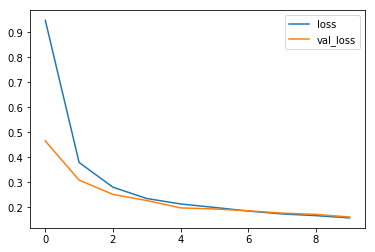

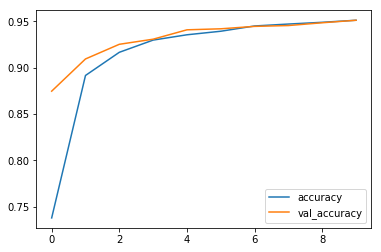

In [12]:
#plot loss data
plt.plot(r.history['loss'] , label='loss')
plt.plot(r.history['val_loss'] , label='val_loss')
plt.legend()
plt.show()

#plot accuracy data
plt.plot(r.history['accuracy'] , label='accuracy')
plt.plot(r.history['val_accuracy'] , label='val_accuracy')
plt.legend()
plt.show()
